In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from scipy.stats import norm
import joblib
import tensorflow as tf
import torch
import scipy
from scipy.spatial.distance import euclidean as euclidean
import torch.nn.functional as F
from torch import optim
import torch.nn as nn
import seaborn as sns

In [2]:
positions = pd.read_csv('UB_Beta1Beta2_Hairpin/ThermoDyn_cutoff_6Ang/DATA/TEMP_85/traj1/traj_pos.out',\
                        sep=',', header=None, names=['x','y','z'])
velocities = pd.read_csv('UB_Beta1Beta2_Hairpin/ThermoDyn_cutoff_6Ang/DATA/TEMP_85/traj1/traj_vel.out',\
                        sep=',', header=None, names=['vx','vy','vz'])
positions = np.asarray(positions)
velocities = np.asarray(velocities)
positions = np.reshape(positions, (1000000,36,3))
velocities = np.reshape(velocities, (1000000,36,3))
velocities = velocities * 1e-10/0.51e-12 #Convert to m/s

In [8]:
mass = 1.8e-25 
for i in range(100):
    print(0.5 * mass * np.sum(velocities[i] * velocities[i]))
    print(0.5 * 36 * scipy.constants.k * 85)

1.1927547397923874e-19
2.1123929700000004e-20
7.813336930795845e-20
2.1123929700000004e-20
8.077300366782006e-20
2.1123929700000004e-20
8.719193747404842e-20
2.1123929700000004e-20
7.865301553633217e-20
2.1123929700000004e-20
8.017190695501729e-20
2.1123929700000004e-20
6.627835176470587e-20
2.1123929700000004e-20
6.558467325259514e-20
2.1123929700000004e-20
8.214458166089963e-20
2.1123929700000004e-20
7.466265294117646e-20
2.1123929700000004e-20
5.983086034602074e-20
2.1123929700000004e-20
6.157402287197231e-20
2.1123929700000004e-20
7.884948276816609e-20
2.1123929700000004e-20
5.769543342560552e-20
2.1123929700000004e-20
5.667815847750863e-20
2.1123929700000004e-20
5.682411550173007e-20
2.1123929700000004e-20
6.817030653979238e-20
2.1123929700000004e-20
5.566440252595155e-20
2.1123929700000004e-20
6.493606570934256e-20
2.1123929700000004e-20
5.680943716262975e-20
2.1123929700000004e-20
7.129903162629757e-20
2.1123929700000004e-20
6.466551256055363e-20
2.1123929700000004e-20
5.4684257

In [3]:
# positions = np.asarray(positions)
# positions = np.reshape(positions, (1000000,36,3))
# velocities = np.asarray(velocities)
# velocities = np.reshape(velocities, (1000000,36,3))
# trainInputs = np.concatenate((positions,velocities),axis=1)
# trainInputs = torch.Tensor(trainInputs)

# trainInputs = trainInputs.permute((0,2,1))
# print(trainInputs[0,:])

In [4]:
# shift = positions[:,0]
# shift = np.repeat(shift[None,:], 36, axis=1)
# shift = np.reshape(shift, (1000000,36,3))
# positions = positions - shift

In [5]:
# def rotation_matrix_from_vectors(vec1, vec2):
#     """ Find the rotation matrix that aligns vec1 to vec2
#     :param vec1: A 3d "source" vector
#     :param vec2: A 3d "destination" vector
#     :return mat: A transform matrix (3x3) which when applied to vec1, aligns it with vec2.
#     """
#     a, b = (vec1 / np.linalg.norm(vec1)).reshape(3), (vec2 / np.linalg.norm(vec2)).reshape(3)
#     v = np.cross(a, b)
#     c = np.dot(a, b)
#     s = np.linalg.norm(v)
#     kmat = np.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])
#     rotation_matrix = np.eye(3) + kmat + kmat.dot(kmat) * ((1 - c) / (s ** 2))
#     return rotation_matrix

In [6]:
# for i in range(len(positions)):
    
#     a = rotation_matrix_from_vectors(positions[i][-2],[0,0,1])
#     positions[i] = np.dot(a, positions[i].T).T
#     velocities[i] = np.dot(a, velocities[i].T).T
    
#     if i % 100000 == 0:
#         print(i)

In [4]:
# positions = np.asarray(positions)
# positions = np.reshape(positions, (1000000,36,3))
# velocities = np.asarray(velocities)
# velocities = np.reshape(velocities, (1000000,108))

In [1]:
# numFrames = velocities.shape[0]
# numBeads = velocities.shape[1]

# matVelX = np.zeros((numFrames, numBeads, numBeads))
# matVelY = np.zeros((numFrames, numBeads, numBeads))
# matVelZ = np.zeros((numFrames, numBeads, numBeads))

# # matVelX = np.load('matVelX.npy')
# # matVelY = np.load('matVelX.npy')
# # matVelZ = np.load('matVelX.npy')

# # print(matVeX[0])
# for k in range(numFrames):
#     velX = velocities[k,:,0]
#     velY = velocities[k,:,1]
#     velZ = velocities[k,:,2]
    
#     for i in range(numBeads):
#         for j in range(i+1,numBeads):
#             matVelX[k][i][j] = np.round(velX[i] - velX[j],3)
#             matVelY[k][i][j] = np.round(velY[i] - velY[j],3)
#             matVelZ[k][i][j] = np.round(velZ[i] - velZ[j],3)
            
#     matVelX[k] = (matVelX[k] + matVelX[k].T)
#     matVelX[k][np.tril_indices(numBeads)] *= -1

#     matVelY[k] = (matVelY[k] + matVelY[k].T)
#     matVelY[k][np.tril_indices(numBeads)] *= -1

#     matVelZ[k] = (matVelZ[k] + matVelZ[k].T)
#     matVelZ[k][np.tril_indices(numBeads)] *= -1
            
            
            
#     if k % 50000 == 0:
#         print(k)
#         np.save('matVelX.npy', matVelX)
#         np.save('matVelY.npy', matVelY)
#         np.save('matVelZ.npy', matVelZ)

In [13]:
# trainInputs = np.zeros((1,4,numBeads,numBeads))

# batchSize = 50000
# for i in range(0, len(positions), batchSize):
#     trainInputsTemp = np.zeros((batchSize,4,numBeads,numBeads))
#     for j in range(i, i+batchSize):
#         output = np.asarray(scipy.spatial.distance.cdist(positions[j], positions[j]))
#         output = np.concatenate(output[j-i],matVelX[j-i],matVelY[j-i],matVelZ[j-i])
#         trainInputsTemp[j] = output
#     trainInputs = np.vstack((trainInputs, trainInputsTemp))
#     if i % 50000 == 0:
#         print(i, trainInputs.shape)

# trainInputs = trainInputs[1:]

In [11]:
trainInputs = np.zeros((1,18*35 + 108))

batchSize = 50000
for i in range(0, len(positions), batchSize):
    pairDists = np.zeros((batchSize, 18*35))
    for j in range(i, i+batchSize):
        output = np.asarray(scipy.spatial.distance.cdist(positions[j], positions[j]))
        output = np.triu(output)
        output = output[output!=0]
        pairDists[j-i] = output
        
    trainInputsTemp = np.concatenate((pairDists,velocities[i:i+batchSize]), axis=1)
    trainInputs = np.vstack((trainInputs, trainInputsTemp))
    if i % 50000 == 0:
        print(i, trainInputs.shape)

0 (50001, 738)
50000 (100001, 738)
100000 (150001, 738)
150000 (200001, 738)
200000 (250001, 738)
250000 (300001, 738)
300000 (350001, 738)
350000 (400001, 738)
400000 (450001, 738)
450000 (500001, 738)
500000 (550001, 738)
550000 (600001, 738)
600000 (650001, 738)
650000 (700001, 738)
700000 (750001, 738)
750000 (800001, 738)
800000 (850001, 738)
850000 (900001, 738)
900000 (950001, 738)
950000 (1000001, 738)


In [12]:
trainInputs = trainInputs[1:]

In [60]:
# output = np.asarray(scipy.spatial.distance.cdist(positions[2329], positions[2329]))
# output = np.triu(output)
# # output = output[output!=0]
# print(output)

In [4]:
features = pd.read_csv('UB_Beta1Beta2_Hairpin/ThermoDyn_cutoff_6Ang/DATA/TEMP_85/traj1/data.out', \
                   delim_whitespace=True, header=None, names=['time','energy', 'Rg', 'Ree', 'ftot', 'fbb','temp'])

energies = pd.read_csv('UB_Beta1Beta2_Hairpin/FES/FES_Ree_ftot_fes_85.dat', sep='\t', header=None, names=['rg','energy','fe'])
energies = np.asarray(energies) 
rg = np.asarray(features['Rg'])
energy = np.asarray(features['energy'])
rg = ree[1:]
energy = ftot[1:]

In [7]:
binx = np.arange(energies[:,0].min(), energies[:,0].max(), energies[50][0] - energies[0][0])
biny = np.arange(energies[:,1].min(), energies[:,1].max(), energies[1][1] - energies[0][1])

width = 0.3 * 1.9872/1000 * 85

print(width)

s1 = [np.digitize(6.18805158,binx), np.digitize(0.65,biny)]
s2 = [np.digitize(34.07495623,binx), np.digitize(0.19,biny)]
s3 = [np.digitize(22.92019437,binx), np.digitize(0.45,biny)]

print(s1,s2,s3)

0.0506736
[3, 33] [58, 10] [36, 23]


In [8]:
nTransitions = -1
prevState = -1

tTransitions = []
length = len(ree)
timeNote = np.zeros(length)
trainLabels = np.zeros(length)
nextState = [-1, -1]

values = []
for i in range(length):
    
    if i % 100000 == 0:
        print(i)
        
    if i < nextState[0]:
        trainLabels[i] = nextState[1]
        timeNote[i] = nextState[0] - i
        continue
            
    idx = np.digitize(ree[i], binx)
    idy = np.digitize(ftot[i], biny)
  
    dist1 = euclidean([idx,idy], s1)
    dist2 = euclidean([idx,idy], s2)
    dist3 = euclidean([idx,idy], s3)
    
    dists = np.asarray([dist1,dist2,dist3])
    
    energy = energies[(idx-1)*50 + (idy-1),2] + energies[(idx-1)*50 + (idy),2] +\
             energies[(idx)*50 + (idy-1),2] + energies[(idx)*50 + (idy),2]
        
    energy = energy/4
    
    values.append(energy)
    
    if 0 < (energy - 0.00) <  width and dists.argmin() + 1 == 1:
        trainLabels[i] = 1
        timeNote[i] = 0
        if nTransitions == -1:
            prevState = 1
            nTransitions += 1

        elif prevState != 1:
            nTransitions += 1
            prevState = 1
            tTransitions.append(i)            
        continue

    if 0 < (energy - 0.24531188) <  width and dists.argmin() + 1 == 2:
        trainLabels[i] = 2
        timeNote[i] = 0
        if nTransitions == -1:
            prevState = 2
            nTransitions += 1

        elif prevState != 2:
            nTransitions += 1
            prevState = 2
            tTransitions.append(i)            
        continue   

    if 0 < (energy - 0.62252361) <  width and dists.argmin() + 1 == 3 and 0.36 <= ftot[i] <= 0.54:
        trainLabels[i] = 3
        timeNote[i] = 0
        
        if nTransitions == -1:
            prevState = 3
            nTransitions += 1

        elif prevState != 3:
            nTransitions += 1
            prevState = 3
            tTransitions.append(i)            
        continue   
    
    for j in range(i+1, len(ree)):
        

        
        idx = np.digitize(ree[j], binx)
        idy = np.digitize(ftot[j], biny)

        dist1 = euclidean([idx,idy], s1)
        dist2 = euclidean([idx,idy], s2)
        dist3 = euclidean([idx,idy], s3)

        dists = np.asarray([dist1,dist2,dist3])
        
        energy = energies[(idx-1)*50 + (idy-1),2] + energies[(idx-1)*50 + (idy),2] +\
                 energies[(idx)*50 + (idy-1),2] + energies[(idx)*50 + (idy),2]

        energy = energy/4

        if 0 < (energy - 0.00) <  width and dists.argmin() + 1 == 1:
            trainLabels[i] = 1
            timeNote[i] = j - i
            nextState = [j, 1]
            if nTransitions == -1:
                prevState = 1
                nTransitions += 1

            elif prevState != 1:
                nTransitions += 1
                prevState = 1
                tTransitions.append(j)
            break

        if 0 < (energy - 0.24531188) <  width and dists.argmin() + 1 == 2:
            trainLabels[i] = 2
            timeNote[i] = j - i
            nextState = [j, 2]
            
            if nTransitions == -1:
                prevState = 2
                nTransitions += 1

            elif prevState != 2:
                nTransitions += 1
                prevState = 2
                tTransitions.append(j)
            break
            
        if 0 < (energy - 0.62252361) <  width and dists.argmin() + 1 == 3 and 0.36 <= ftot[j] <= 0.54:
            trainLabels[i] = 3
            timeNote[i] = j - i
            nextState = [j,3]
            
            if nTransitions == -1:
                prevState = 3
                nTransitions += 1

            elif prevState != 3:
                nTransitions += 1
                prevState = 3
                tTransitions.append(j)            
            break   

        
        if j == len(ree) - 1:
            nextState = [j, 'unk']
            
    if nextState[1] == 'unk':
        trainLabels = trainLabels[:i]
        break

df = pd.DataFrame({'Ree': ree[:len(trainLabels)], 'ftot': ftot[:len(trainLabels)], 'trainLabels': trainLabels })

0
100000
200000
300000
400000
500000
600000
700000
800000
900000


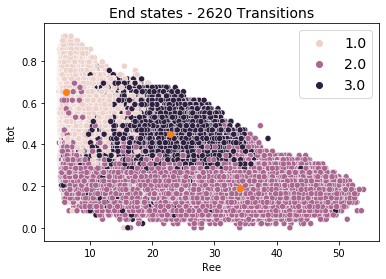

In [35]:
a = sns.scatterplot(data=df[df['trainLabels']!=0], x='Ree', y='ftot', hue='trainLabels')
a.legend(fontsize=14)
plt.scatter(x=22.92019437, y=0.45,c='C1')
plt.scatter(x=34.07495623, y=0.19,c='C1')
plt.scatter(x=6.18805158, y=0.65,c='C1')
a.set_title('End states - ' + str(nTransitions) + ' Transitions', size=14)
a.figure.savefig('endState.png')

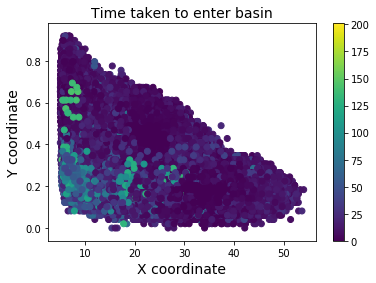

In [36]:
import matplotlib.tri as tri

x = ree
y = ftot
z = timeNote

plt.title("Time taken to enter basin", size=14)
plt.xlabel('X coordinate', size=14)
plt.ylabel('Y coordinate', size=14)
plt.scatter(x,y,c=z)
plt.colorbar()
plt.savefig("timeTaken.png")

In [9]:
tTransitions = np.asarray(tTransitions)
time = tTransitions[1:] - tTransitions[:-1]
print(time.mean(), np.median(time))

381.45360824742266 128.0


In [16]:
# np.save('UB_Beta1Beta2_Hairpin/ThermoDyn_cutoff_6Ang/DATA/TEMP_85/traj1/trainLabels_ree_ftot_kbt_3state.npy', trainLabels) #End few missing
# np.save('UB_Beta1Beta2_Hairpin/ThermoDyn_cutoff_6Ang/DATA/TEMP_85/traj1/trainInput_pairDistVel.npy', trainInputs) #All 

trainInputs = np.load('UB_Beta1Beta2_Hairpin/ThermoDyn_cutoff_6Ang/DATA/TEMP_85/traj1/trainInput_pairDistVel.npy')
trainLabels = np.load('UB_Beta1Beta2_Hairpin/ThermoDyn_cutoff_6Ang/DATA/TEMP_85/traj1/trainLabels_ree_ftot_kbt_3state.npy')

In [2]:
validLabels = np.load('UB_Beta1Beta2_Hairpin/ThermoDyn_cutoff_6Ang/DATA/TEMP_85/traj2/validLabels_ree_ftot_kbt_3state.npy')
validInputs = np.load('UB_Beta1Beta2_Hairpin/ThermoDyn_cutoff_6Ang/DATA/TEMP_85/traj2/validInput_pairDistVel.npy')

In [19]:
del validInputs,validLabels

In [9]:
validOutput = model(torch.Tensor(validInputs))

In [13]:
print(((output.argmax(dim=1) == validLabels).sum()/len(validLabels)).item())

0.9227762818336487


In [10]:
cutoff = np.where(timeNote < np.median(time))
cutoff = np.asarray(cutoff)
cutoff = cutoff[cutoff < len(trainLabels)]

cutoffOpp = np.where(timeNote > np.median(time))
cutoffOpp = np.asarray(cutoffOpp)
cutoffOpp = cutoffOpp[cutoffOpp < len(trainLabels)]

missingInputs = trainInputs[cutoffOpp]
missingLabels = trainLabels[cutoffOpp]
trainInputs = trainInputs[cutoff]
trainLabels = trainLabels[cutoff]
# training, validation = split(dataset, labelCol)
# trainInputs = training[:,:labelCol]
# trainLabels = training[:,labelCol]
# validInputs = validation[:,:labelCol]
# validLabels = validation[:,labelCol]

In [11]:
print(trainInputs.shape, missingInputs.shape)

(999405, 738) (554, 738)


In [ ]:
plt.xlim([ree.min(), ree.max()])
plt.ylim([ftot.min(), ftot.max()])
plt.scatter(x=22.92019437, y=0.45,c='g')
sns.scatterplot(data=df[df['trainLabels']==3], x='Ree', y='ftot', hue='trainLabels')

In [9]:
# for i in range(10):
#     plt.figure()
#     plt.xlim([ree.min(), ree.max()])
#     plt.ylim([ftot.min(), ftot.max()]) 
#     plt.scatter(x=22.92019437, y=0.45,c='g')
#     plt.scatter(x=34.07495623, y=0.19,c='g')
#     plt.scatter(x=6.18805158, y=0.65,c='g')
    
#     print(ree[tTransitions[i]],ftot[tTransitions[i]], ree[tTransitions[i+1]], ftot[tTransitions[i+1]],\
#          trainLabels[tTransitions[i]],trainLabels[tTransitions[i+1]])
#     plt.plot(ree[tTransitions[i]:tTransitions[i+1]], ftot[tTransitions[i]:tTransitions[i+1]])

In [12]:
print(trainInputs.shape, trainLabels.shape)

(999405, 738) (999405,)


In [ ]:
for i in range(1,4):
    plt.figure()
    plt.scatter(x=22.92019437, y=0.45,c='C0')
    plt.scatter(x=34.07495623, y=0.19,c='C0')
    plt.scatter(x=6.18805158, y=0.65,c='C0')
    plt.xlim([ree.min(), ree.max()])
    plt.ylim([ftot.min(), ftot.max()])
    loc = np.where(trainLabels==i)
    plt.scatter(ree[loc],ftot[loc],label='State' + str(i),c='C' + str(i))
    plt.legend()

In [4]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(738, 512)
        self.hidden2 = nn.Linear(512,128)
        self.activation = nn.ReLU()
        self.output = nn.Linear(128, 3)

    def forward(self, x):
        x = self.hidden(x)
        x = self.activation(x)
        x = self.hidden2(x)
        x = self.activation(x)
        x = self.output(x)
        return x

In [66]:
weights = torch.Tensor(np.unique(trainLabels,return_counts=True)[1])
print(weights)
weights = weights/weights.sum()
print(weights)
weights = 1.0 / weights
weights = weights / weights.sum()
print(weights)

tensor([368595., 548236.,  82574.])
tensor([0.3688, 0.5486, 0.0826])
tensor([0.1630, 0.1096, 0.7275])


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(4, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 3)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [13]:
trainInputs = torch.Tensor(trainInputs)
# trainInputs = trainInputs[:len(trainLabels)]
trainLabels = torch.Tensor(trainLabels).type(torch.LongTensor) - 1

In [82]:
losses2000 = np.zeros(2000)
losses2000[:1000] = losses1000

In [83]:
# model = Model()
loss_function = nn.CrossEntropyLoss(weight=weights)
optimizer = optim.Adam(model.parameters(), lr=0.0005, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
nEpochs = 200
losses = np.zeros(nEpochs)

for epoch in range(0, nEpochs): ## run the model for 100 epochs
    
    model.train()
    
    optimizer.zero_grad()
    
    output = model(trainInputs)
    loss = loss_function(output, trainLabels)
    
    loss.backward()
    
    optimizer.step()
    
    losses[epoch] = np.mean(loss.item())
    
    if epoch % 5 == 0:
        print ("Epoch:", epoch, "Training Loss: ", np.mean(loss.item()), ((output.argmax(dim=1) == trainLabels).sum()/len(trainLabels)).item())
    
    

Epoch: 0 Training Loss:  0.12309867143630981 0.9579189419746399
Epoch: 5 Training Loss:  0.5657790899276733 0.6825781464576721
Epoch: 10 Training Loss:  0.30929791927337646 0.9583272337913513
Epoch: 15 Training Loss:  0.2554159462451935 0.9573336243629456
Epoch: 20 Training Loss:  0.24716734886169434 0.9093600511550903
Epoch: 25 Training Loss:  0.19836467504501343 0.9386074542999268
Epoch: 30 Training Loss:  0.19716404378414154 0.9584052562713623
Epoch: 35 Training Loss:  0.18571262061595917 0.9449682831764221
Epoch: 40 Training Loss:  0.1783054620027542 0.944976270198822
Epoch: 45 Training Loss:  0.17505744099617004 0.9559327960014343
Epoch: 50 Training Loss:  0.16982673108577728 0.9505935907363892
Epoch: 55 Training Loss:  0.16629979014396667 0.9493929147720337
Epoch: 60 Training Loss:  0.16327227652072906 0.9548401236534119
Epoch: 65 Training Loss:  0.1604861319065094 0.951291024684906
Epoch: 70 Training Loss:  0.15795794129371643 0.9529730081558228
Epoch: 75 Training Loss:  0.15579

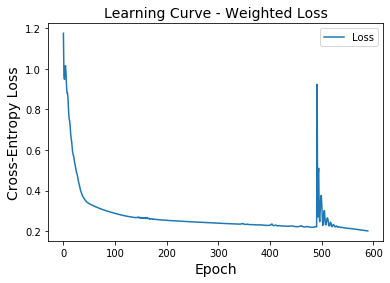

In [81]:
plt.title('Learning Curve - Weighted Loss', size=14)
plt.xlabel('Epoch', size=14)
plt.ylabel('Cross-Entropy Loss', size=14)
plt.plot(losses1000[10:600], label='Loss')
plt.legend()
plt.savefig('UbqImages/lossCurveWeighted.png')

In [20]:
# from point import *

# model = PointNetCls(k=3)

# loss_function = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
# losses = np.zeros(100)

# minibatch = 10000

# for epoch in range(0, 5): ## run the model for 100 epochs
#     epochLoss = 0
#     epochAcc = 0
#     for mini in range(0,len(trainLabels),minibatch):
#         print(mini)
        
#         i = trainInputs[mini:mini+minibatch]
#         o = trainLabels[mini:mini+minibatch]
        
#         model.train()

#         optimizer.zero_grad()

#         output = model(i)
#         loss = loss_function(output[0], o)
        
#         loss.backward()

#         optimizer.step()

#     for mini in range(0,len(trainLabels),minibatch):
#         i = trainInputs[mini:mini+minibatch]
#         o = trainLabels[mini:mini+minibatch]
#         output = model(i)
#         loss = loss_function(output[0], 0)
#         epochLoss += loss.item()
#         epochAcc += (output[0].argmax(dim=1) == o).sum()/len(o).item()
    
#     epochLoss = epochLoss * minibatch/len(trainLabels)
#     epochAcc = epochAcc * minibatch/len(trainLabels)
    
#     print ("Epoch:", epoch, "Training Loss: ", epochLoss, epochAcc)



In [21]:
# minibatch = 2000
# for mini in range(0,len(trainLabels),minibatch):
#     i = trainInputs[mini:mini+minibatch]
#     o = trainLabels[mini:mini+minibatch]
#     output = model(i)
#     loss = loss_function(output[0], o)
#     epochLoss += loss.item()
#     epochAcc += ((output[0].argmax(dim=1) == o).sum()/len(o)).item()

# epochLoss = epochLoss * minibatch/len(trainLabels)
# epochAcc = epochAcc * minibatch/len(trainLabels)

# print ("Epoch:", epoch, "Training Loss: ", epochLoss, epochAcc)


In [85]:
output = model(trainInputs)
confusion = np.zeros((3,3))

print(len(output.argmax(dim=1)==1), len(trainLabels))
for i in range(3):
    for j in range(3):
        confusion[i][j] = torch.sum(np.logical_and(output.argmax(dim=1) == j, trainLabels == i))/torch.sum(trainLabels==i)
        
confusion = np.round(confusion,2)
print(confusion)

999405 999405
[[0.97 0.01 0.02]
 [0.01 0.95 0.04]
 [0.   0.05 0.95]]


In [ ]:
# a = np.where(output.argmax(dim=1) != trainLabels)
# print(len(a))
# plt.scatter(ree[a],ftot[a])

In [ ]:
# print(losses[90])
# scaler = preprocessing.StandardScaler().fit(trainInputs)

# clf = MLPClassifier(hidden_layer_sizes=[8,4], alpha=0.001,\
#                     max_iter = 100, solver='adam', learning_rate_init=0.0001)

# clf.fit(scaler.transform(trainInputs), trainLabels)


In [ ]:
# scaler = preprocessing.StandardScaler().fit(trainInput2[:100000])

# clf = MLPClassifier(hidden_layer_sizes=[8,4], alpha=0.001,\
#                     max_iter = 100, solver='adam', learning_rate_init=0.0001)

# clf.fit(scaler.transform(trainInput2[:100000]), trainLabels[:100000])

# # print("Validation accuracy = ", clf.score(scaler.transform(validInputs), validLabels))

In [5]:
# torch.save(model.state_dict(), 'modelWeighted')
model = Model()
model.load_state_dict(torch.load('modelWeighted'))
model.eval()

Model(
  (hidden): Linear(in_features=738, out_features=512, bias=True)
  (hidden2): Linear(in_features=512, out_features=128, bias=True)
  (activation): ReLU()
  (output): Linear(in_features=128, out_features=3, bias=True)
)

In [6]:
modelInference = model
# modelInference.load_state_dict(torch.load('model'))

In [74]:
output = modelInference(trainInputs)
print(((output.argmax(dim=1) == trainLabels).sum()/len(trainLabels)).item())

0.9466702938079834


In [14]:
kb = scipy.constants.k
T = 85
m = 1.8e-25
mean = 0
std = np.sqrt(kb*T/m)

scalingFactor = 0.51 * 1e-12/1e-10
print(mean,std)

0 80.74485363717548


In [54]:
del committorTemp, predPositions,predVels,toPred,committor

In [36]:
trials = 500
batch_size = 2000

print("Started predictions")

committor = np.asarray([0,0,0])

for i in range(0,len(trainInputs),batch_size):
    
    committorTemp = np.zeros((batch_size,3))

    predPositions = np.repeat(trainInputs[i:i+batch_size, :630], repeats=trials, axis=0)
    
    predVels = np.random.normal(mean, std, (len(predPositions),36*3))
    
#     KEfactors = (108*kb*T/2)/np.sum(0.5 * m * np.square(predVels),axis=1)
#     KEfactors = np.expand_dims(KEfactors, axis=1)
#     KEfactors = np.repeat(KEfactors,108,axis=1)
#     predVels = np.multiply(np.sqrt(KEfactors), predVels)
    
    toPred = np.concatenate((predPositions, predVels), axis=1)
    toPred = torch.Tensor(toPred)
    preds = modelInference(toPred).argmax(dim=1)
    preds += 1
    
    for j in range(0, batch_size):
        
        if i+j >= len(trainInputs):
            committorTemp = committorTemp[:j]
            break
        predictions = preds[j*trials:(j+1)*trials]
        unique, count = np.unique(predictions, return_counts=True)
        counts = [0,0,0]
        if len(unique) == 1:
            counts[int(unique[0]) - 1] = count[0]
        elif len(unique) == 2:
            counts[int(unique[0]) - 1] = count[0]
            counts[int(unique[1]) - 1] = count[1]
        
#         if (counts[0] + counts[1]) != 0:
#             counts = np.asarray(counts)/(counts[0]+counts[1])
            
        committorTemp[j] = np.asarray(counts)/trials
        
        
        if int(i+j+1) % 50000 == 0:
            print("Finished step " + str(i+j+1) + " of " + str(len(trainInputs)))
    
    committor = np.vstack((committor,committorTemp))

print("Finished predictions")

committor = committor[1:]
np.save('UB_Beta1Beta2_Hairpin/ThermoDyn_cutoff_6Ang/DATA/TEMP_85/traj1/committorWeighted.npy', committor)

Started predictions
Finished step 50000 of 1000000
Finished step 100000 of 1000000
Finished step 150000 of 1000000
Finished step 200000 of 1000000
Finished step 250000 of 1000000
Finished step 300000 of 1000000
Finished step 350000 of 1000000
Finished step 400000 of 1000000
Finished step 450000 of 1000000
Finished step 500000 of 1000000
Finished step 550000 of 1000000
Finished step 600000 of 1000000
Finished step 650000 of 1000000
Finished step 700000 of 1000000
Finished step 750000 of 1000000
Finished step 800000 of 1000000
Finished step 850000 of 1000000
Finished step 900000 of 1000000
Finished step 950000 of 1000000
Finished step 1000000 of 1000000
Finished predictions


In [2]:
# committor = committor[1:]
# np.save('UB_Beta1Beta2_Hairpin/ThermoDyn_cutoff_6Ang/DATA/TEMP_85/traj1/committorWeighted.npy', committor)
committor = np.load('UB_Beta1Beta2_Hairpin/ThermoDyn_cutoff_6Ang/DATA/TEMP_85/traj1/committorWeighted.npy')

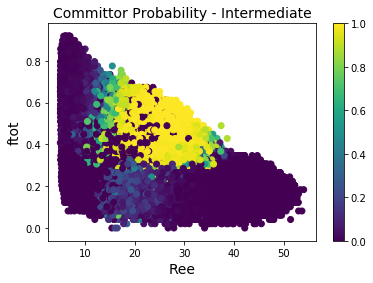

In [54]:
plt.title('Committor Probability - Intermediate', size=14)
plt.xlabel('Ree', size=14)
plt.ylabel('ftot', size=14)
plt.scatter(x=ree[:len(committor)], y=ftot[:len(committor)], c=committor[:,2])
plt.colorbar()
plt.savefig('UbqImages/commIntermediateWeighted.png')
plt.show()

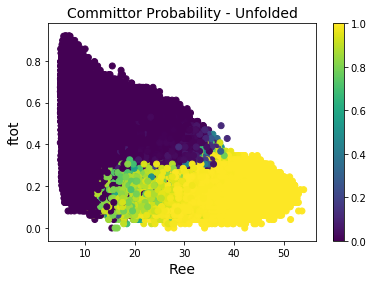

In [55]:
plt.title('Committor Probability - Unfolded', size=14)
plt.xlabel('Ree', size=14)
plt.ylabel('ftot', size=14)
plt.scatter(x=ree[:len(committor)], y=ftot[:len(committor)], c=committor[:,1])
plt.colorbar()
plt.savefig('UbqImages/commUnfoldedWeighted.png')
plt.show()

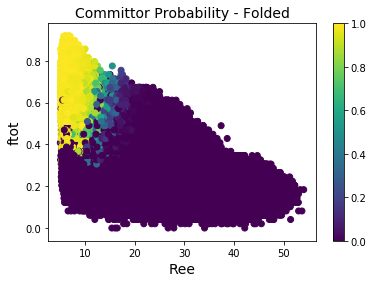

In [86]:
plt.title('Committor Probability - Folded', size=14)
plt.xlabel('Ree', size=14)
plt.ylabel('ftot', size=14)
plt.scatter(x=ree[:len(committor)], y=ftot[:len(committor)], c=committor[:,0])
plt.colorbar()
plt.savefig('UbqImages/commFoldedWeighted.png')
plt.show()

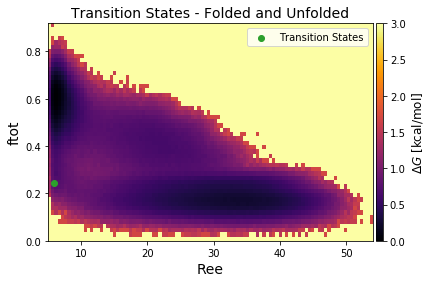

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import argparse
from mpl_toolkits.axes_grid1 import make_axes_locatable

i1 = 100
i2 = 50
T = 85
x_l = 'Ree'#.decode('utf8')
y_l = 'ftot'#.decode('utf8')

# energies = pd.read_csv('FES_Ree_ftot_fes_85.dat', sep='\t', header=None, names=['ree','ftot','fe'])
    
minv1 = ree.min()
maxv1 = ree.max()
minv2 = ftot.min()
maxv2 = ftot.max()

DG = np.load('DG.npy')

z_l = r'$\Delta G$'+' [kcal/mol]' #using latex in matplotlib


transitionStates = np.where(np.logical_and(np.absolute(committor[:,0] - 0.5) <= 0.05,\
                                           np.absolute(committor[:,1] - 0.5) <= 0.05))

plt.figure()
ax = plt.gca()
im = ax.imshow(DG.T, cmap=cm.inferno, extent=[minv1,maxv1,minv2,maxv2], origin='lower', aspect='auto') 
#google matplotlib colormaps for color schemes other than "plasma"
plt.title("Transition States - Folded and Unfolded", fontsize=14)
plt.xlabel(x_l, fontsize=14)
plt.ylabel(y_l, fontsize=14)
k = 0
plt.scatter(ree[transitionStates], ftot[transitionStates], c='C2', label='Transition States')
# plt.plot(linX, linReg, c='C1', label='Linear regression')
# loc = np.where(trainLabels!=0)
# plt.axhline(y=0.54,color='r')
# plt.axhline(y=0.36,color='r')
# plt.scatter(ree[loc],ftot[loc],c=trainLabels[loc])
# plt.scatter(x=22.92019437, y=0.45,c='C1')
# plt.scatter(x=34.07495623, y=0.19,c='C1')
# plt.scatter(x=6.18805158, y=0.65,c='C1')
plt.legend()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label(z_l,size=12) 
plt.savefig('UbqImages/TS_1_2.png')

In [ ]:
x = ree[:len(committor)]
y = ftot[:len(committor)]
z = committor[:,0]

plt.title("Committor probability of hairpin", size=14)
plt.xlabel('X coordinate', size=14)
plt.ylabel('Y coordinate', size=14)
plt.scatter(x,y,c=z)
plt.colorbar()
plt.savefig("model_CommProb.png")

In [200]:
ts = []
for i in range(len(transitionStates[0])):
    for j in range(len(bins[1])):
        if ree[transitionStates[0][i]] < bins[1][j]:
            ts.append([ree[transitionStates[0][i]], fe[j]])
            break

ts = np.asarray(ts)
print(ts.shape)

(140, 2)


In [202]:
print(ts[:,0])

[7.539933 7.51248  7.537051 7.543619 7.571505 7.529424 7.550912 7.55027
 7.537072 7.561621 7.541918 7.548571 7.555903 7.534851 7.570449 7.554289
 7.549346 7.540605 7.56594  7.539455 7.559966 7.529045 7.545396 7.565626
 7.560499 7.564689 7.55545  7.574295 7.551778 7.565947 7.532524 7.542771
 7.527552 7.537108 7.554119 7.561268 7.572384 7.546332 7.544728 7.548079
 7.550382 7.562817 7.550917 7.552845 7.548168 7.535646 7.541232 7.564201
 7.527185 7.531804 7.553564 7.540684 7.506373 7.542025 7.531685 7.555651
 7.558435 7.574821 7.551101 7.524367 7.542607 7.537018 7.561442 7.528545
 7.528412 7.572029 7.571913 7.523298 7.570791 7.553911 7.534109 7.544943
 7.567416 7.57298  7.557954 7.571004 7.556271 7.570878 7.571397 7.578197
 7.542763 7.558499 7.527573 7.519667 7.550814 7.5311   7.568656 7.596695
 7.54366  7.549828 7.534209 7.552201 7.544256 7.566339 7.584425 7.577034
 7.529285 7.544981 7.549512 7.532693 7.551303 7.559988 7.539805 7.540071
 7.547315 7.574525 7.547345 7.546379 7.557511 7.5563

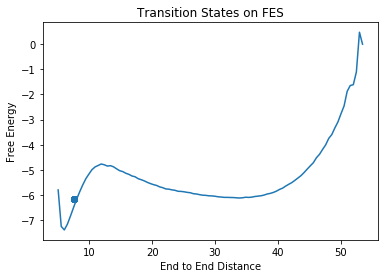

In [201]:
bins = np.histogram(ree, 100)
fe = - 0.008314 * 82.5 * np.log(bins[0]/len(bins))
plt.plot(bins[1][:-1], fe)
plt.title('Transition States on FES')
plt.xlabel('End to End Distance')
plt.ylabel('Free Energy')
plt.scatter(ts[:,0],ts[:,1])

In [272]:
np.save('load85_traj1/trainLabel.npy', trainLabels)

In [ ]:
np.save('load85_traj1/trainInput.npy', trainInput)

In [275]:
joblib.dump(clf, 'load85_traj1/model.sav')

['load85_traj1/model.sav']

In [5]:
trainLabels = np.load('load85_traj1/trainLabel.npy')

In [8]:
clf = joblib.load('load85_traj1/model.sav')

In [10]:
positions = trainInput[:,:108]
velocities = trainInput[:,108:216]

In [13]:
scaler = preprocessing.StandardScaler().fit(trainInput)

In [16]:
features = pd.read_csv('UB_Beta1Beta2_Hairpin/ThermoDyn_cutoff_6Ang/DATA/TEMP_85/traj1/data.out', \
                   delim_whitespace=True, header=None, names=['time','energy', 'Rg', 'Ree', 'ftot', 'fbb','temp'])

In [107]:
ree = np.asarray(features['Ree'])

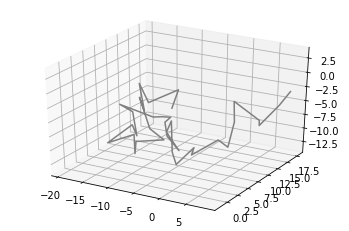

In [49]:
# from mpl_toolkits import mplot3d
# fig = plt.figure()
# ax = plt.axes(projection='3d')

# x = positions[transitionStates[0][0]][:,0]
# y = positions[transitionStates[0][0]][:,1]
# z = positions[transitionStates[0][0]][:,2]
              
# ax.plot3D(x, y, z, 'gray')

In [59]:
print(ree[transitionStates[0][0]], ftot[transitionStates[0][0]])

17.942773000000003 0.469388


In [52]:
transitionStates = np.where(np.logical_and(np.absolute(committor[:,0] - 0.5) <= 0.05,\
                                           np.absolute(committor[:,1] - 0.5) <= 0.05))
print(36)
print("")
for i in range(36):
    x = positions[114145][i,0]
    y = positions[114145][i,1]
    z = positions[114145][i,2]
    print("C",x,y,z, sep='\t')

36

C	-253.8585	-228.9793	-51.638
C	-254.6619	-226.6522	-54.2366
C	-254.8125	-232.4011	-50.038
C	-251.8946	-232.6513	-48.3792
C	-257.7788	-234.5744	-50.791
C	-257.8288	-234.24	-53.1961
C	-259.1529	-237.3903	-48.587
C	-255.8778	-238.2589	-48.1275
C	-262.0838	-239.8529	-49.3169
C	-263.252	-240.0186	-47.6931
C	-264.5301	-241.0517	-51.9178
C	-263.9535	-244.7981	-52.8011
C	-266.8441	-238.863	-54.0836
C	-266.5504	-236.924	-54.4994
C	-270.2372	-241.0354	-53.8814
C	-271.875	-242.7586	-55.1246
C	-271.6875	-237.5631	-54.2361
C	-271.6612	-236.4034	-52.5183
C	-271.4302	-234.9307	-56.6939
C	-272.301	-235.0863	-56.1096
C	-272.25	-231.8192	-58.5879
C	-272.287	-232.2543	-62.2689
C	-268.8622	-230.2731	-59.4515
C	-268.6659	-229.2082	-57.8369
C	-266.8563	-228.2954	-62.1393
C	-268.1237	-226.3378	-63.233
C	-263.9453	-229.6757	-64.0119
C	-264.0793	-230.3371	-65.9839
C	-260.2466	-229.241	-62.6991
C	-259.4819	-231.7877	-62.9553
C	-256.9857	-227.3217	-62.4678
C	-257.3699	-224.3437	-64.0977
C	-254.5605	-228.438

In [122]:
print(np.where(np.logical_and(np.absolute(ree - 6.18805158) < 0.01, np.absolute(ftot - 0.65 < 0.01))))

(array([  2329,   2619,   2830, ..., 998277, 998290, 999637]),)


In [112]:
print(np.where(np.absolute(ree - 6.18805158) < 100))

(array([0]),)


In [113]:
print(np.absolute(ree[i] - 6.18805158))

16.13536342


In [123]:
print(positions.shape)

(1000000, 36, 3)


In [125]:
print(trainInputs[2329])

tensor([ 3.5283e+00,  3.9539e+00,  5.6924e+00,  7.1431e+00,  6.2543e+00,
         1.0608e+01,  1.1523e+01,  1.4600e+01,  1.5891e+01,  1.6792e+01,
         1.6942e+01,  1.7460e+01,  1.6673e+01,  2.0487e+01,  2.0494e+01,
         2.1625e+01,  2.1651e+01,  2.1471e+01,  2.0849e+01,  1.8803e+01,
         2.0529e+01,  1.5553e+01,  1.5874e+01,  1.3442e+01,  1.4826e+01,
         1.1020e+01,  1.2179e+01,  7.7918e+00,  9.7956e+00,  5.3999e+00,
         5.9605e+00,  5.5277e+00,  7.4981e+00,  6.1944e+00,  8.5708e+00,
         7.0418e+00,  7.6155e+00,  9.7498e+00,  8.1697e+00,  1.3483e+01,
         1.4806e+01,  1.7411e+01,  1.8870e+01,  1.9164e+01,  1.9407e+01,
         1.9351e+01,  1.8410e+01,  2.2013e+01,  2.1617e+01,  2.3277e+01,
         2.3069e+01,  2.3572e+01,  2.3047e+01,  2.0932e+01,  2.2747e+01,
         1.7522e+01,  1.7494e+01,  1.5910e+01,  1.7162e+01,  1.4002e+01,
         1.5324e+01,  1.0945e+01,  1.2972e+01,  8.0846e+00,  8.6640e+00,
         6.4452e+00,  8.1010e+00,  5.9480e+00,  7.7

In [132]:
a = np.unique(trainLabels, return_counts=True)
print(a[1] * 100/np.sum(a[1]))

[36.86940556 54.86570352  8.26489091]


In [72]:
from sklearn.linear_model import LinearRegression

X = ree[transitionStates].reshape(-1,1)
y = ftot[transitionStates]

reg = LinearRegression().fit(X, y)

reg

In [82]:
reg.score(X,y)
m = reg.coef_
c = reg.intercept_
linX = np.arange(ree[transitionStates].min(),ree[transitionStates].max(),0.01)
linReg = linX* m + c

In [80]:
print(linReg)

[0.49810289 0.50208028 0.46750548 0.53607019 0.53146142 0.57515937
 0.49648103 0.54909908 0.49269817 0.538499   0.46253935 0.50953915
 0.46691377 0.49294277 0.47159627 0.53000906 0.48184756 0.5028065
 0.47068532 0.52248817 0.511317   0.4786999  0.49206393 0.52112797
 0.489292   0.42250929 0.5862588  0.51083724 0.48929539 0.5167631
 0.50255309 0.50320643]


In [93]:
import time
start_time = time.time()
output = model(torch.Tensor(trainInputs[0]))
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0009353160858154297 seconds ---
